In [94]:
import os
import glob
import matplotlib.pyplot as plt
import rasterio
import numpy as np


# A function that plots tif images from MODIS/061/MOD09GQ collection 
# it takes as input only the directory in which the images are located 
def cloudplot(image_dir, width, height, extension):
# Get sorted list of .tif files
    tif_files = sorted(glob.glob(os.path.join(image_dir, extension)))

    # Define subplot layout
    n_images = len(tif_files)
    n_cols = 5
    n_rows = (n_images + n_cols - 1) // n_cols  # Automatically calculate rows
    # width = n_cols * 4
    # height = n_rows * 3

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(width,height))
    axes = axes.flatten()

    # Visualization stretch parameters
    vis_min = 0
    vis_max = 5000

    def normalize(band):
        return np.clip((band - vis_min) / (vis_max - vis_min), 0, 1)

    for i, (file_path, ax) in enumerate(zip(tif_files, axes)):
        with rasterio.open(file_path) as src:
            b1 = src.read(1).astype('float32')
            b2 = src.read(2).astype('float32')

        r = normalize(b1)
        g = normalize(b1)
        b = normalize(b2)
        rgb = np.dstack((r, g, b))

        # Extract year from filename
        filename = os.path.basename(file_path)
        year = filename.split('_')[1].split('.')[0]

        ax.imshow(rgb)
        ax.set_title(f'{year}', fontsize=30)
        # Optional: turn off ticks
        ax.set_xticks([])
        ax.set_yticks([])
        # ✅ Add border around image
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_edgecolor('black')
            spine.set_linewidth(4)
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.15, hspace=0.25)
    return plt.show()


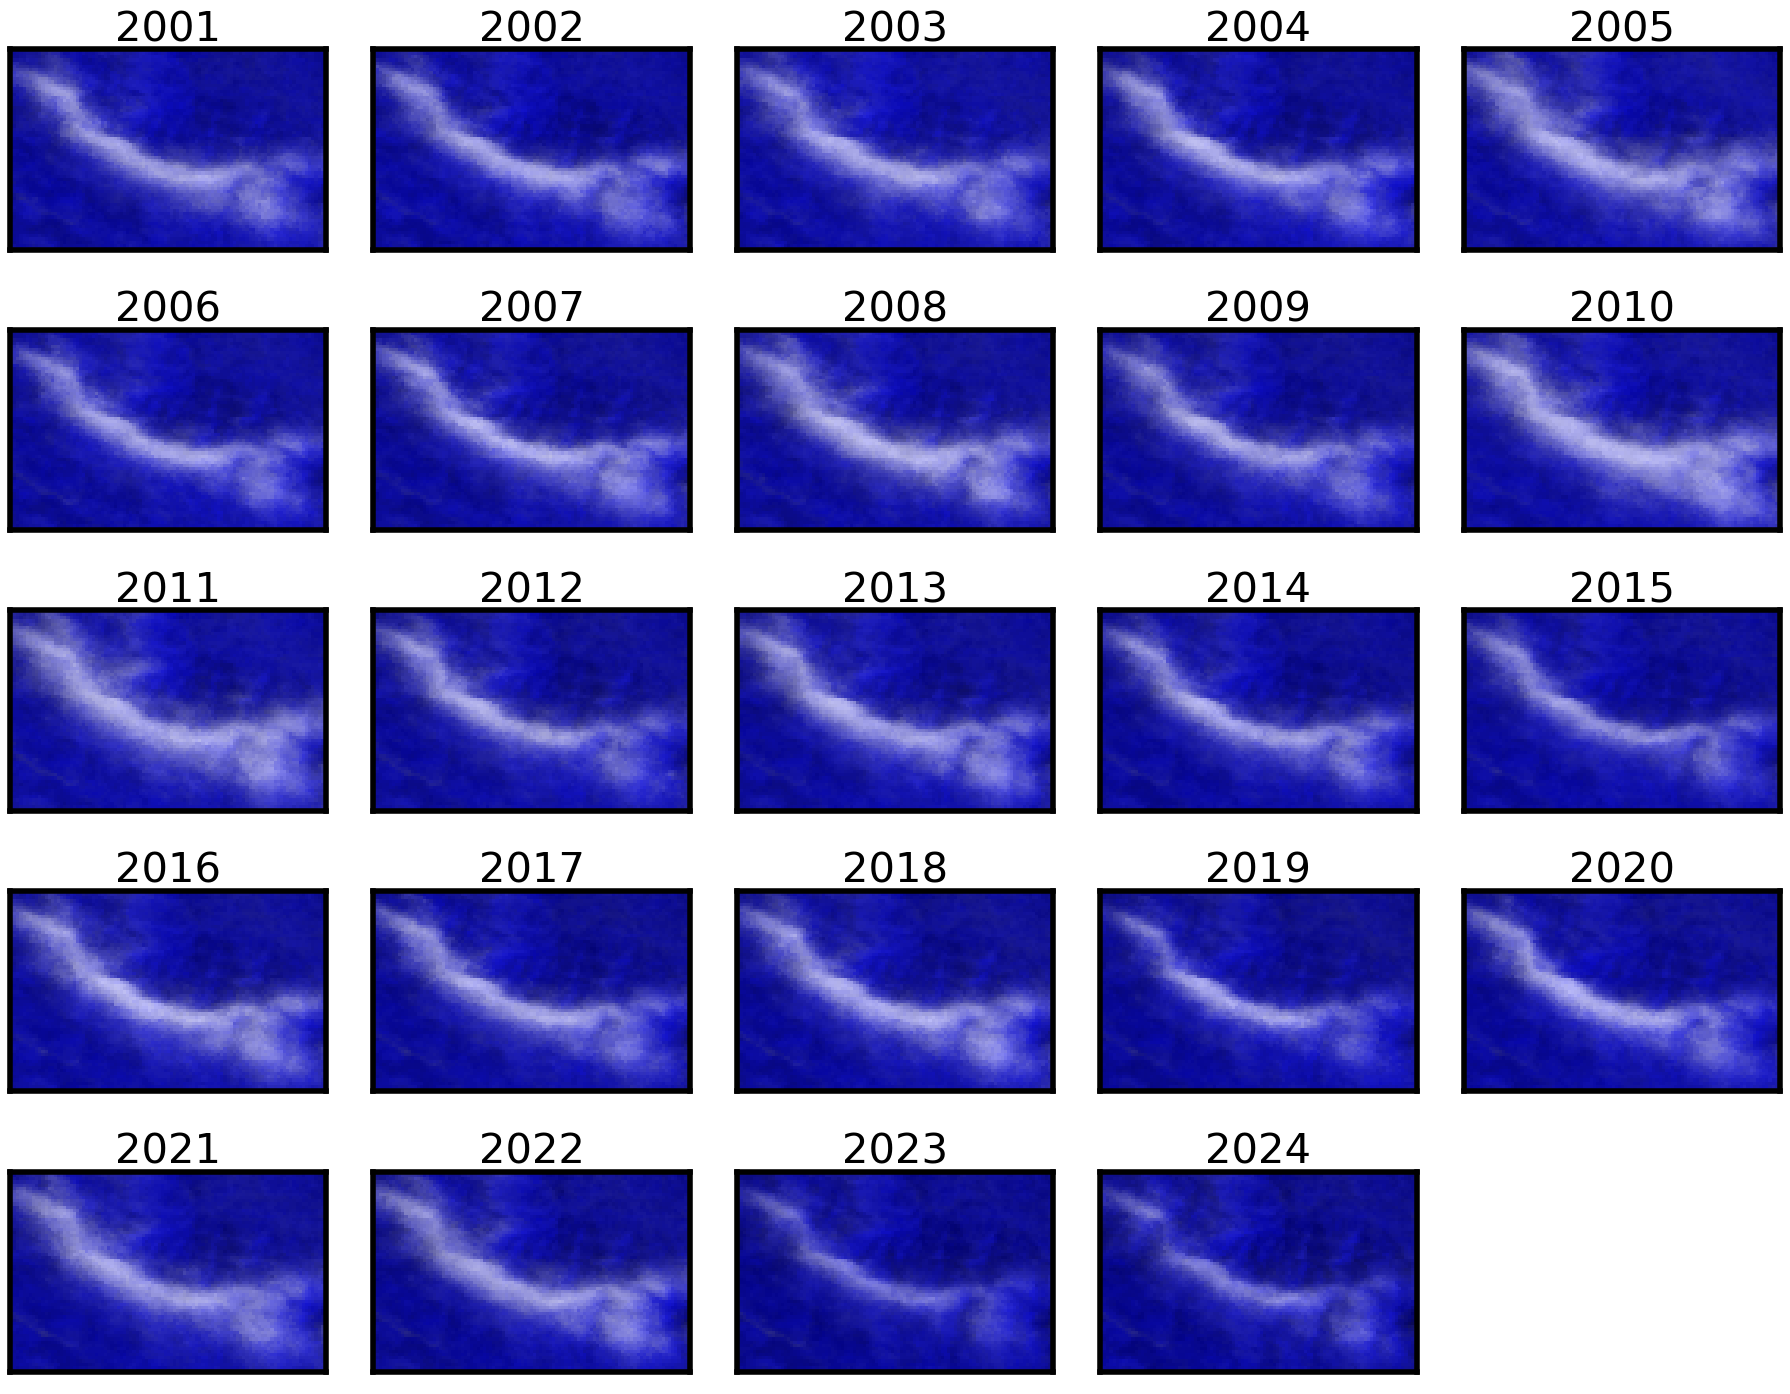

In [ ]:
cloudplot("modis/aoi1",18,14, '*.tif')
# cloudplot('modis/aoi2',18,18, '*.tif')
# cloudplot('modis/aoi3',18,18, '*.tif')

In [89]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# A function to plot RGB PNG images from a folder
def cloudplot_png(image_dir, width, height, extension):
    # Get sorted list of image files (e.g., *.png)
    image_files = sorted(glob.glob(os.path.join(image_dir, extension)))

    # Define subplot layout
    n_images = len(image_files)
    n_cols = 5
    n_rows = (n_images + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(width, height))
    axes = axes.flatten()

    for i, (file_path, ax) in enumerate(zip(image_files, axes)):
        # Load RGB image (automatically scaled between 0 and 1 or 0 and 255)
        img = mpimg.imread(file_path)

        # Extract year from filename (e.g., image_2001.png)
        filename = os.path.basename(file_path)
        year = '20' + filename.split('.')[0]

        ax.imshow(img)
        ax.set_title(f'{year}', fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])

        # Add a visible border
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_edgecolor('black')
            spine.set_linewidth(2)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.15, hspace=0.25)
    plt.show()


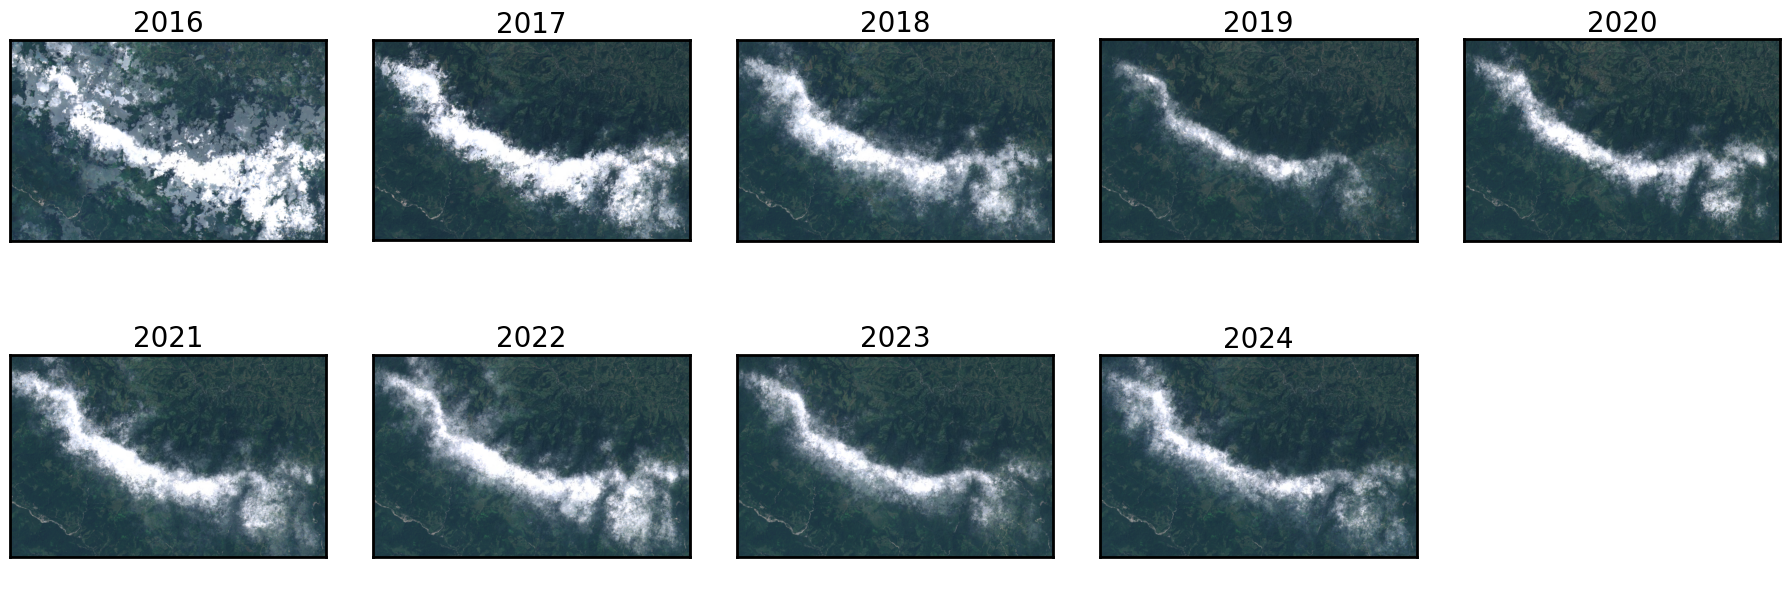

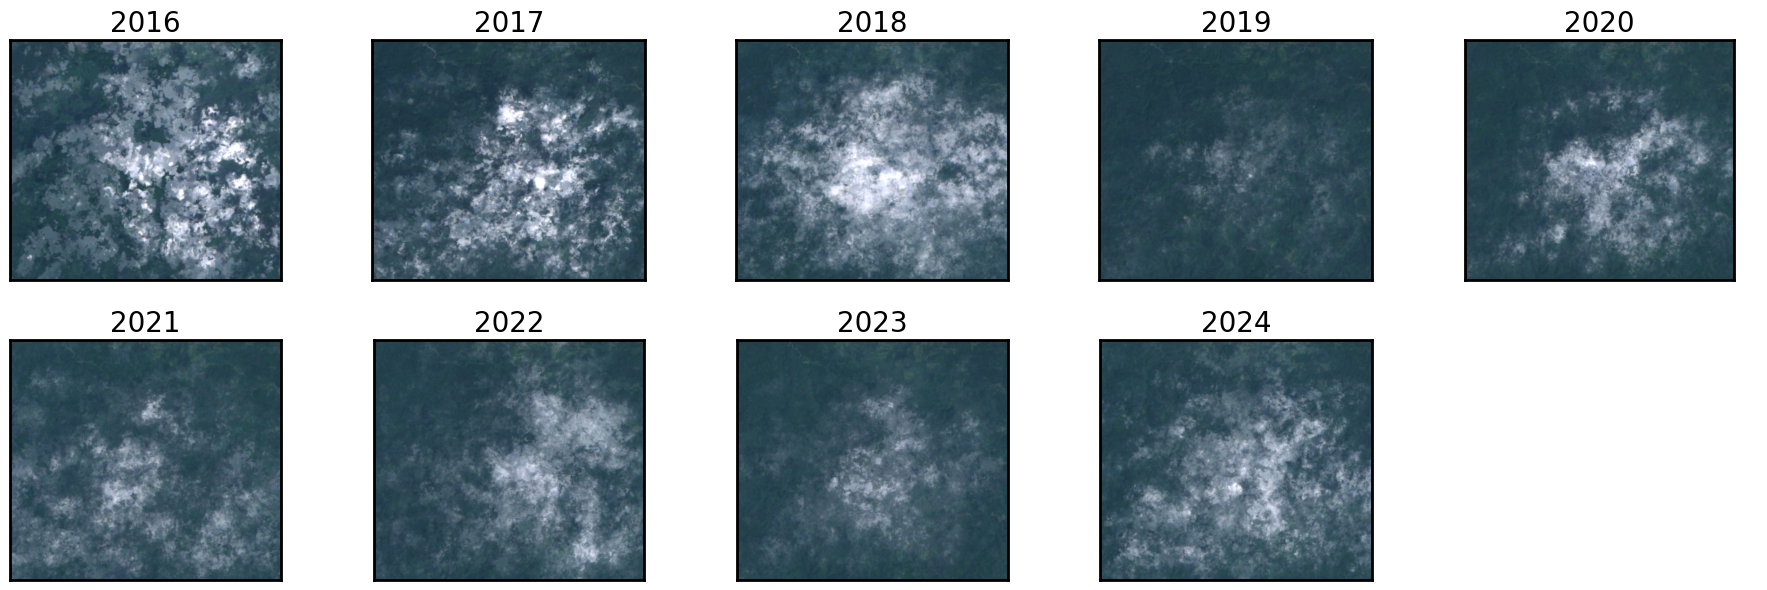

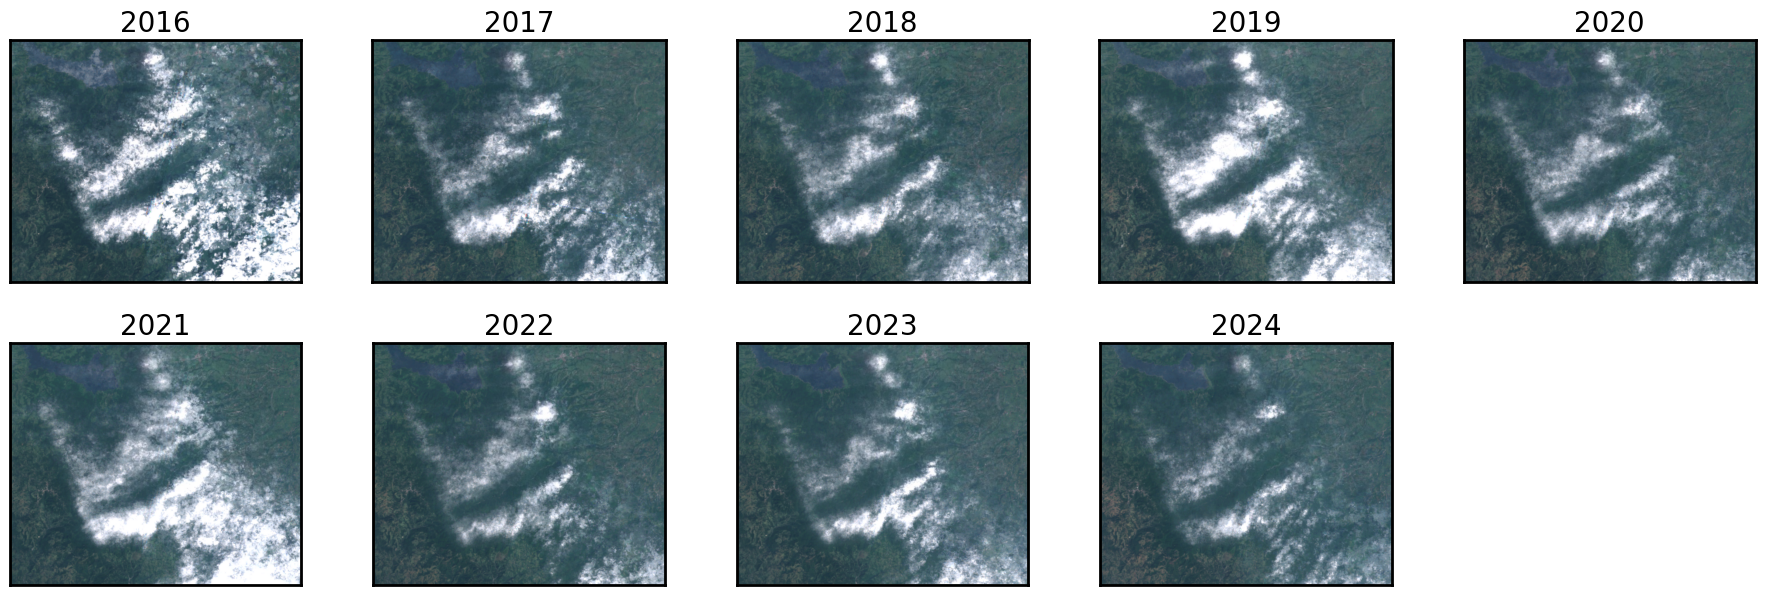

In [99]:
cloudplot_png("s2/aoi1",18,6, '*.png')
cloudplot_png("s2/aoi2",18,6, '*.png')
cloudplot_png("s2/aoi3",18,6, '*.png')